Find and plot the temperature gradient and the shock direction.
NB: problems in plotting due to the scale of ax.quiver.
NB: you produce and save plot not txt or other data

In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt
import Utilities.prelude

from Utilities.operators import make_tree, calc_grad

In [2]:
gamma = 5/3
mach_min = 1.3
folder = 'TDE'
snap = '683'
path = f'{folder}/{snap}'

In [3]:
sim_tree, X, Y, Z, Vol, VX, VY, VZ, Den, Press, Temp = make_tree(path, snap)
dim_cell = (3*Vol/(4*np.pi))**(1/3)

In [4]:
# - gradient of T
gradx = np.zeros(len(X))
grady = np.zeros(len(X))
X_cell = np.zeros(len(X)) 
Y_cell = np.zeros(len(X))
Z_cell = np.zeros(len(X))

for i in range(len(X)):
    point = [X[i],Y[i],Z[i]]
    if np.linalg.norm(point)>7_000:
        continue
    step = 2*dim_cell[i]
    grad =  calc_grad(sim_tree, X, Y, Z, Temp, point, step)
    gradx[i] = -grad[0]
    grady[i] = -grad[1]

lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iteratio

In [5]:
# Cross section 
z_chosen = 0
x_cross = []
y_cross = []
flat_T = []

gradx_cross = []
grady_cross = []

for i,z_val in enumerate(Z):
    if np.abs(z_val) < z_chosen + 20:
        x_cross.append(X[i])
        y_cross.append(Y[i])
        flat_T.append(Temp[i])
        gradx_cross.append(gradx[i])
        grady_cross.append(grady[i])

T_cross = np.log10(flat_T)
T_cross = np.nan_to_num(T_cross, neginf = 0)

x_cross = np.array(x_cross)
y_cross = np.array(y_cross)
gradx_cross = np.array(gradx_cross)
grady_cross = np.array(grady_cross)


In [6]:
print(f'max grad_x: {np.max(gradx_cross)}, max grad_y: {np.max(grady_cross)}')

max grad_x: 4197422.779369598, max grad_y: 3297934.775256098


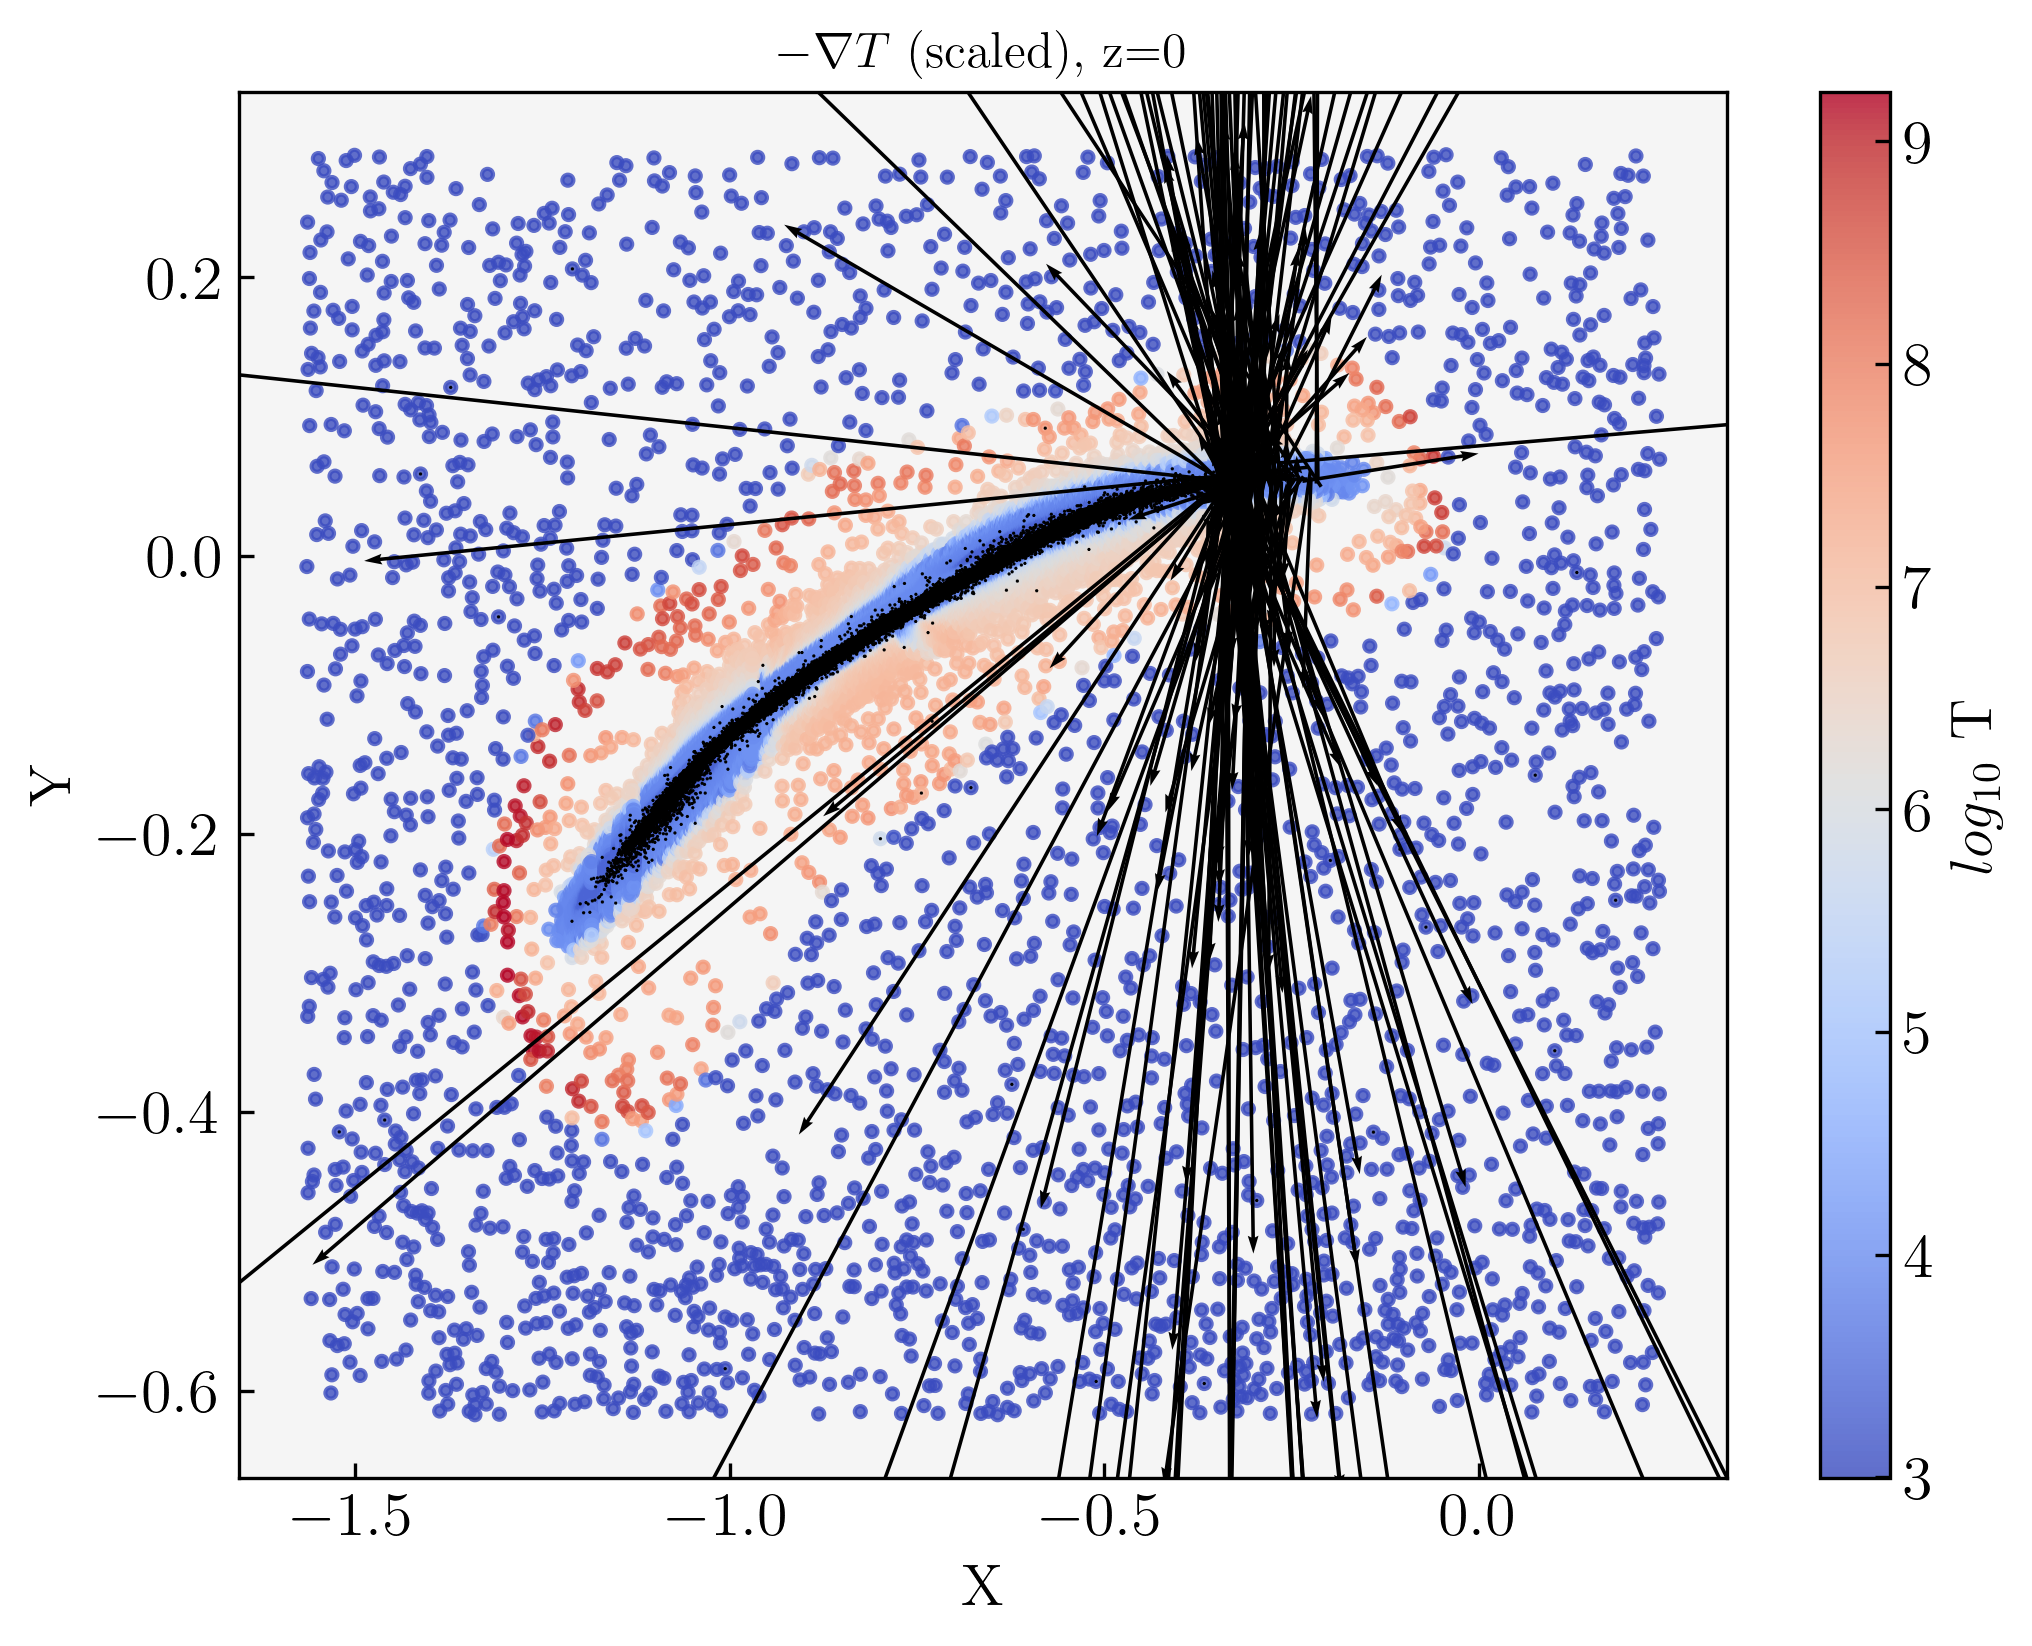

In [11]:
# - Gradient T
fig, ax = plt.subplots(1,1)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
img = ax.scatter(x_cross/20_000, y_cross/20_000, c = T_cross, s = 7, cmap = 'coolwarm', alpha =0.8)
cb = plt.colorbar(img)
cb.set_label(r'$log_{10}$ T', fontsize = 14)
ax.quiver(x_cross[::100]/20_000, y_cross[::100]/20_000, gradx_cross[::100]/20_000, grady_cross[::100]/20_000, color = 'k', angles='xy', scale_units='xy')
plt.title(r'$-\nabla T$ (scaled), ' f'z={z_chosen}')
plt.savefig(f'Figs/1Tslice_grad_{snap}.png')

Now we do the same thing but with shock direction (i.e. (opposite of the) gradient of temperature normalised)

In [12]:
def shock_direction(sim_tree, X, Y, Z, Temp, point, delta):
    """ Find shock direction according eq.(5) by Schaal14 in the point of coordinates indices idx.
    Parameters
    -----------
    sim_tree: nDarray.
            Tree where to search the point.
    X, Y, Z, Temp: arrays.
            Coordinates and temperature of the points of the tree.
    point: array.
            Starting point.
    delta: float.
            Step between 2 neighbours.
    Returns
    -----------
    ds: array.
        Shock direction (vector of 3 components).
    """
    grad = calc_grad(sim_tree, X, Y, Z, Temp, point, delta)
    magnitude = np.linalg.norm(grad)
    
    if np.logical_and(np.abs(grad[0])<1, np.logical_and(np.abs(grad[1])<1, np.abs(grad[2])<1)):
        ds = [0, 0, 0]
    else:
        ds = - np.divide(grad,magnitude)
    return ds

In [13]:
# Shock direction
ds_x = np.zeros(len(X))
ds_y = np.zeros(len(X))
for i in range(len(X)):
    point = [X[i],Y[i],Z[i]]
    ds =  shock_direction(sim_tree, X, Y, Z, Temp, point, step)
    ds_x[i] = ds[0]
    ds_y[i] = ds[1]


lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iterations! 0.0
lots of iteratio

KeyboardInterrupt: 

In [ ]:
# Cross section 
dsx_cross = []
dsy_cross = []

for i,z_val in enumerate(Z):
    if np.abs(z_val) < z_chosen + 20:
        dsx_cross.append(ds_x[i])
        dsy_cross.append(ds_y[i])

dsx_cross = np.array(dsx_cross)
dsy_cross = np.array(dsy_cross)


In [ ]:
# Shock direction plot
fig1, ax1 = plt.subplots(1,1)
ax1.set_xlabel('X', fontsize = 14)
ax1.set_ylabel('Y', fontsize = 14)
img1 = ax1.scatter(x_cross, y_cross, c = T_cross, s = 7, cmap = 'coolwarm', alpha = 0.8)
cb = plt.colorbar(img1)
#plt.xlim(-0.5,0)
cb.set_label(r'$log_{10}$ T', fontsize = 14)
ax1.quiver(x_cross, y_cross, dsx_cross, dsy_cross, color = 'k', angles='xy', scale_units='xy')
plt.title(f'Shock direction, z={z_chosen}')
plt.savefig(f'Figs/2shockDir_z{z_chosen}_{snap}.png')

In [ ]:
# # Histograms to see how big is the gradient. X component
# gradx_delta_hist = gradx_delta
# gradx_delta_hist[gradx_delta_hist<1e-2] = 0

# # Plot
# bins=np.arange(0, np.max(gradx_delta_hist), 300)
# plt.hist(gradx_delta_hist, bins=bins)
# plt.xlabel(r'$\Delta T/\Delta x$', fontsize = 16)
# plt.ylabel('Frequencies', fontsize = 16)
# plt.title(r'$N_{cell}$ = ' + f'{len(gradx_delta_hist)}', fontsize = 16)

# plt.figure()
# binszoom=np.arange(1, np.max(gradx_delta_hist), 300)
# plt.hist(gradx_delta_hist[gradx_delta_hist>1], bins=binszoom)
# plt.xlabel(r'$\Delta T/\Delta x$', fontsize = 16)
# plt.ylabel('Frequencies', fontsize = 16)
# plt.ylim(0,20)
# plt.title('zoom', fontsize = 16)


In [ ]:
# # Histograms to see how big is the gradient. Y component
# grady_delta_hist = grady_delta
# grady_delta_hist[grady_delta_hist<1e-2] = 0

# # Plot
# bins=np.arange(0, np.max(grady_delta_hist), 300)
# plt.hist(grady_delta_hist, bins=bins)
# plt.xlabel(r'$\Delta T/\Delta y$', fontsize = 16)
# plt.ylabel('Frequencies', fontsize = 16)
# plt.title(r'$N_{cell}$ = ' + f'{len(grady_delta_hist)}', fontsize = 16)

# plt.figure()
# binszoom=np.arange(1, np.max(grady_delta_hist), 300)
# plt.hist(grady_delta_hist[grady_delta_hist>1], bins=binszoom)
# plt.xlabel(r'$\Delta T/\Delta y$', fontsize = 16)
# plt.ylabel('Frequencies', fontsize = 16)
# plt.ylim(0,20)
# plt.title('zoom', fontsize = 16)
